In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/V05-00-00/build/lib',
 '/home/jbourbeau/cr-composition/analysis/ShowerLLH',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_6

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn.apionly as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

import composition as comp
# from composition.analysis.load_sim import load_sim
# import composition.analysis.plotting_functions as plotting
# import composition.analysis.data_functions as data_functions

%matplotlib inline

In [3]:
sns.set_palette('muted')
sns.set_color_codes()

In [4]:
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
# standard_cut_keys = ['ShowerLLH_reco_exists', 'reco_zenith', 'IT_signal']
# standard_cut_keys = ['reco_exists']
standard_cut_keys = ['reco_exists', 'reco_zenith', 'num_hits', 'IT_signal',
                     'StationDensity', 'reco_containment',
                     'energy_range']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

print('n_events before cuts = {}'.format(len(df)))
df = df[selection_mask]
print('n_events after cuts = {}'.format(len(df)))

/home/jbourbeau/cr-composition/composition/load_sim.py:73: RuntimeWarning: divide by zero encountered in log10
  df['reco_log_energy'] = np.nan_to_num(np.log10(df['reco_energy']))


n_events before cuts = 441798
n_events after cuts = 51610


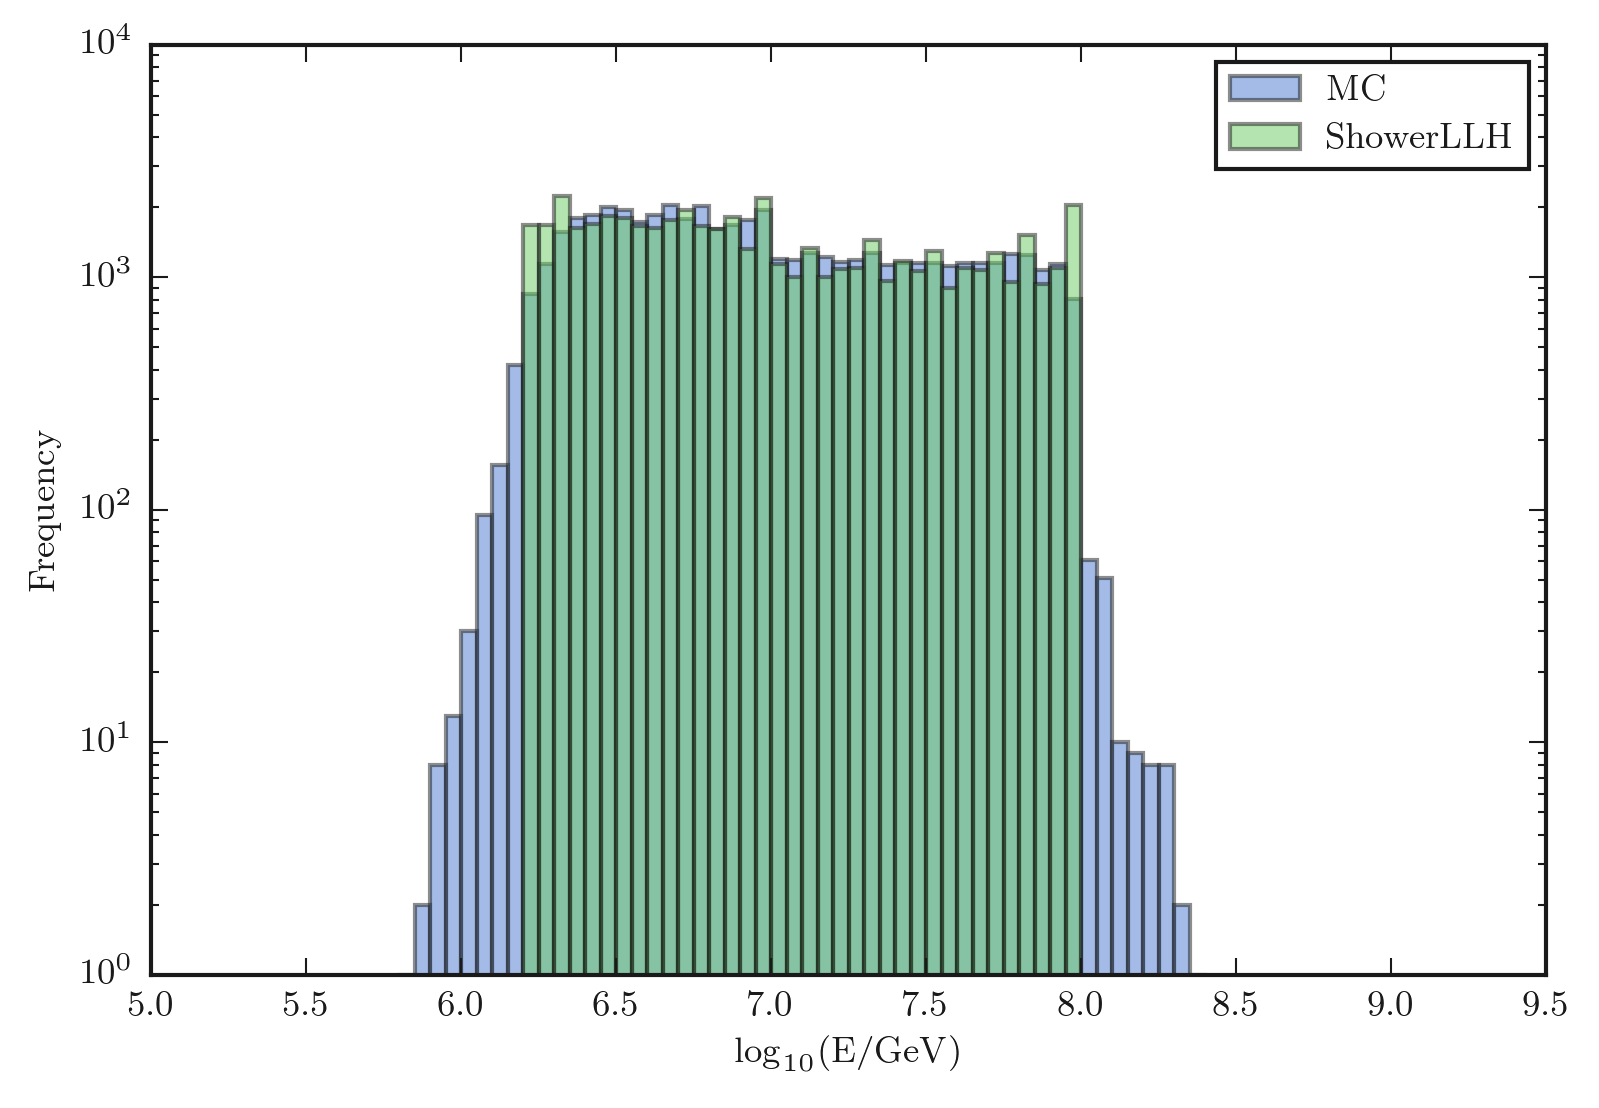

In [8]:
df.MC_log_energy.plot(kind='hist', bins=np.arange(5.0, 9.51, 0.05), alpha=0.5, label='MC')
df.reco_log_energy.plot(kind='hist', bins=np.arange(5.0, 9.51, 0.05), alpha=0.5, label='ShowerLLH', logy=True)
plt.xlabel('$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
plt.legend()

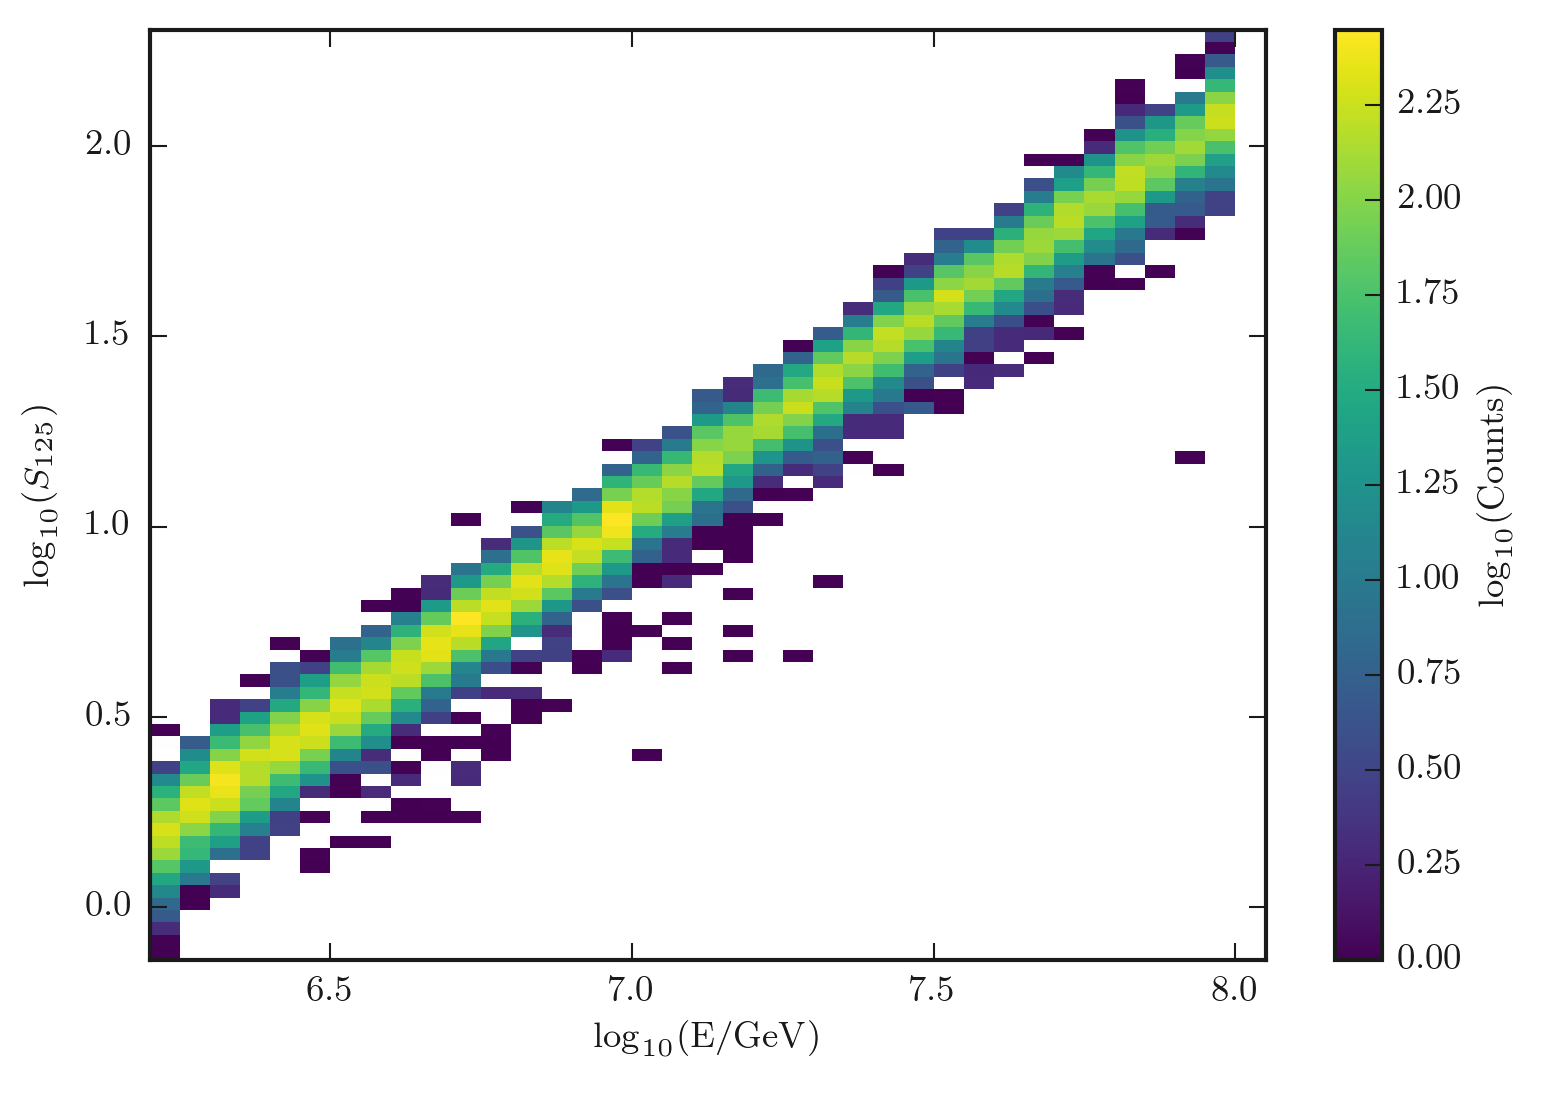

In [16]:
MC_proton_mask = (df['MC_comp'] == 'P')
energy = df['reco_log_energy'][MC_proton_mask]
s125 = df['log_s125'][MC_proton_mask]
comp.histogram_2D(energy, s125, [np.arange(6.2, 8.1, 0.05),75], log_counts=True)
plt.xlabel('$\log_{10}(\mathrm{E}/\mathrm{GeV})$')
plt.ylabel('$\log_{10}(S_{125})$')

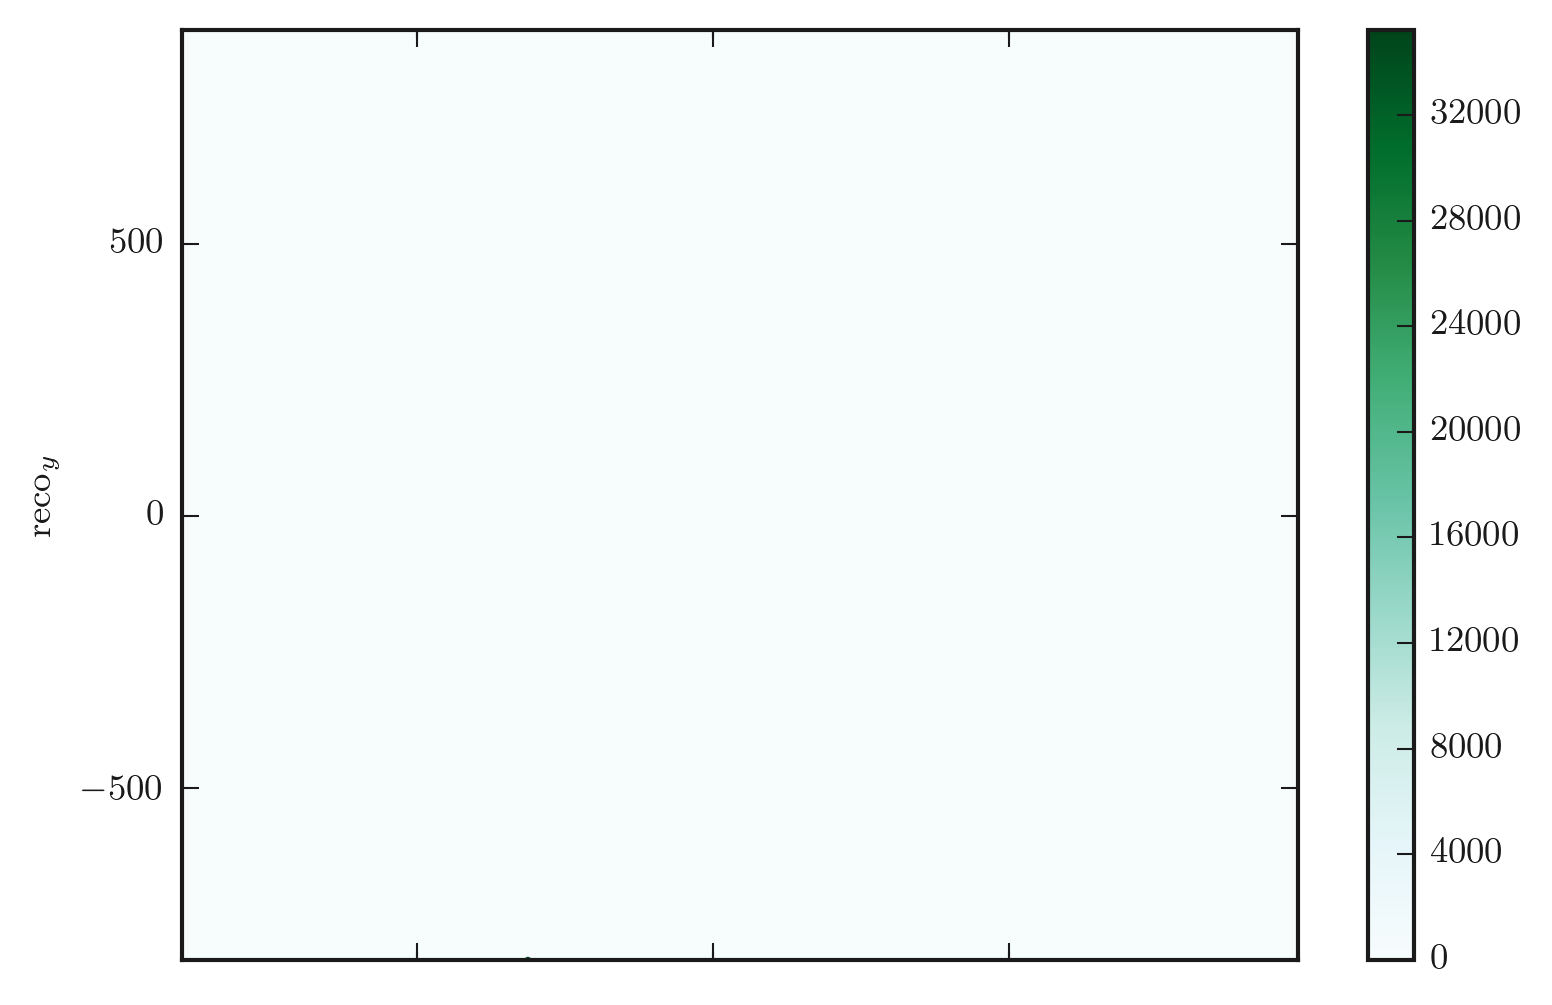

In [16]:
df.plot(kind='hexbin', x='reco_x', y='reco_y')

In [17]:
from pandas.tools.plotting import parallel_coordinates

In [18]:
parallel_coordinates?

In [ ]:
parallel_coordinates()